In [1]:
import faraway.datasets.kanga
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
kanga = faraway.datasets.kanga.load()
kanga

,species,sex,basilar_length,occipitonasal_length,palate_length,palate_width,nasal_length,nasal_width,squamosal_depth,lacrymal_width,zygomatic_width,orbital_width,rostral_width,occipital_depth,crest_width,foramina_length,mandible_length,mandible_width,mandible_depth,ramus_height
0,giganteus,Male,1312.0,1445.0,882.0,NaN,609.0,241,180.0,394,782.0,249,227.0,531.0,153,88,1086.0,131,179,591
1,giganteus,Male,1439.0,1503.0,985.0,230.0,629.0,222,150.0,416,824.0,233,248.0,632.0,141,100,1158.0,148,181,643
2,giganteus,Male,1378.0,1464.0,934.0,NaN,620.0,233,135.0,403,778.0,244,240.0,575.0,144,107,1131.0,116,169,610
3,giganteus,Male,1315.0,1367.0,895.0,230.0,564.0,207,158.0,394,801.0,224,242.0,568.0,116,79,1090.0,132,189,594
4,giganteus,Male,1413.0,1500.0,969.0,NaN,645.0,247,161.0,426,823.0,241,252.0,607.0,120,99,1175.0,131,197,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,fuliginosus,Female,1485.0,1500.0,1016.0,277.0,552.0,205,203.0,454,919.0,225,278.0,676.0,122,74,1260.0,148,194,751
144,fuliginosus,Female,1468.0,1536.0,996.0,264.0,667.0,222,190.0,431,951.0,217,305.0,650.0,178,82,1287.0,141,199,736
145,fuliginosus,Female,1510.0,1546.0,1043.0,264.0,656.0,218,197.0,423,891.0,190,270.0,651.0,78,87,1337.0,158,210,747
146,fuliginosus,Female,1526.0,1512.0,1052.0,281.0,625.0,250,201.0,470,934.0,236,289.0,680.0,145,106,1334.0,153,211,739


In [3]:
kanga = kanga.dropna(axis=1)
kanga

,species,sex,nasal_width,lacrymal_width,orbital_width,crest_width,foramina_length,mandible_width,mandible_depth,ramus_height
0,giganteus,Male,241,394,249,153,88,131,179,591
1,giganteus,Male,222,416,233,141,100,148,181,643
2,giganteus,Male,233,403,244,144,107,116,169,610
3,giganteus,Male,207,394,224,116,79,132,189,594
4,giganteus,Male,247,426,241,120,99,131,197,654
...,...,...,...,...,...,...,...,...,...,...
143,fuliginosus,Female,205,454,225,122,74,148,194,751
144,fuliginosus,Female,222,431,217,178,82,141,199,736
145,fuliginosus,Female,218,423,190,78,87,158,210,747
146,fuliginosus,Female,250,470,236,145,106,153,211,739


In [4]:
# Changing data for integers
Label = preprocessing.LabelEncoder()
kanga['species'] = Label.fit_transform(kanga['species'])
kanga['sex'] = Label.fit_transform(kanga['sex'])

C:\Users\joanp\AppData\Local\Temp/ipykernel_12268/3501374719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kanga['species'] = Label.fit_transform(kanga['species'])
C:\Users\joanp\AppData\Local\Temp/ipykernel_12268/3501374719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kanga['sex'] = Label.fit_transform(kanga['sex'])


In [5]:
kanga.dtypes

species            int32
sex                int32
nasal_width        int64
lacrymal_width     int64
orbital_width      int64
crest_width        int64
foramina_length    int64
mandible_width     int64
mandible_depth     int64
ramus_height       int64
dtype: object

In [6]:
Y = kanga['species']
X = kanga.drop(columns=['species'])
# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [7]:
print(Y_train)
print(Y_test)

93     2
141    0
108    0
0      1
73     2
      ..
71     2
106    0
14     1
92     2
102    0
Name: species, Length: 103, dtype: int32
125    0
51     2
139    0
19     1
104    0
12     1
76     2
31     1
81     2
9      1
26     1
96     2
144    0
67     2
135    0
66     2
18     1
69     2
124    0
30     1
29     1
105    0
36     1
118    0
55     2
22     1
64     2
131    0
82     2
11     1
136    0
45     1
119    0
27     1
4      1
127    0
134    0
146    0
42     1
16     1
10     1
115    0
85     2
140    0
56     2
Name: species, dtype: int32


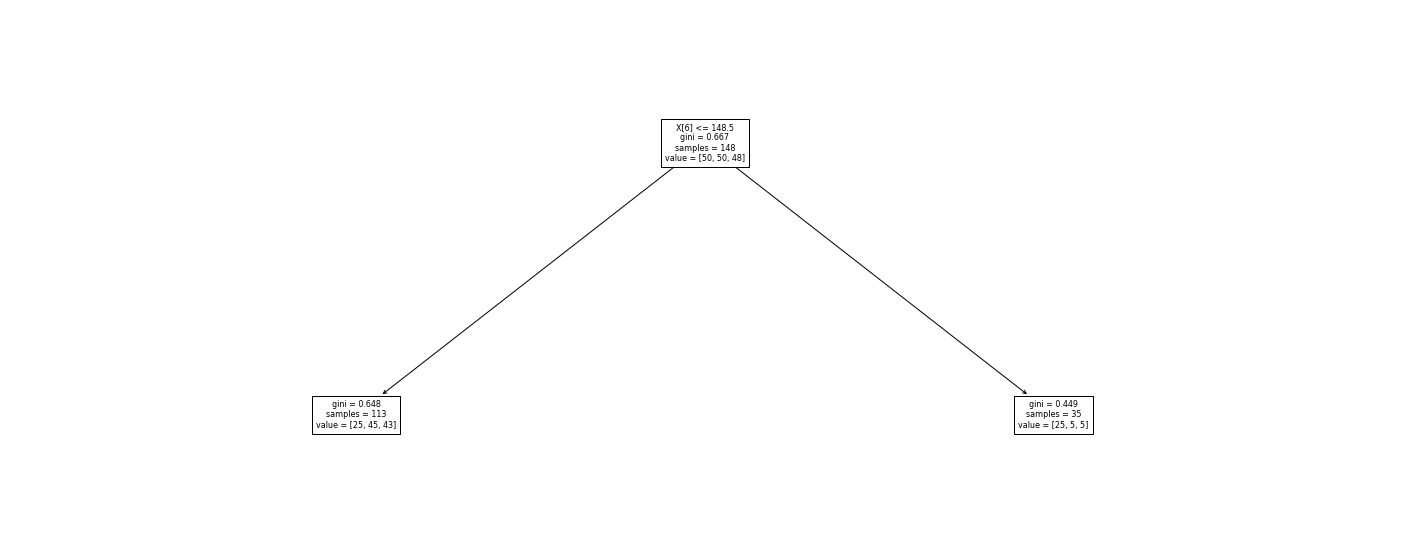

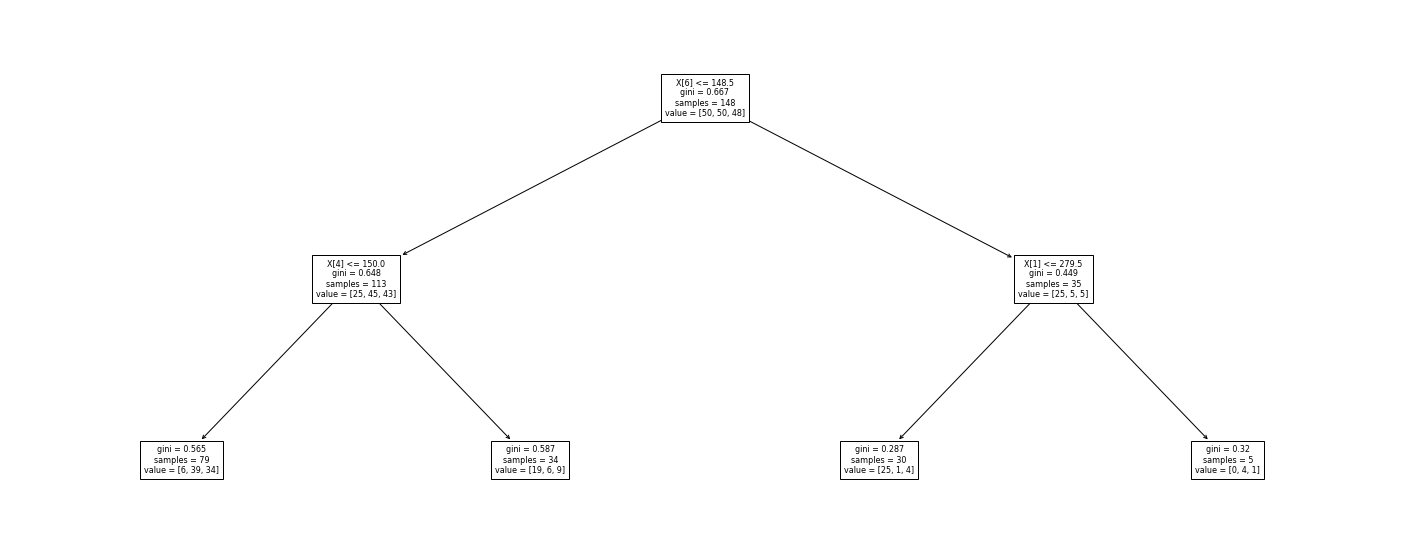

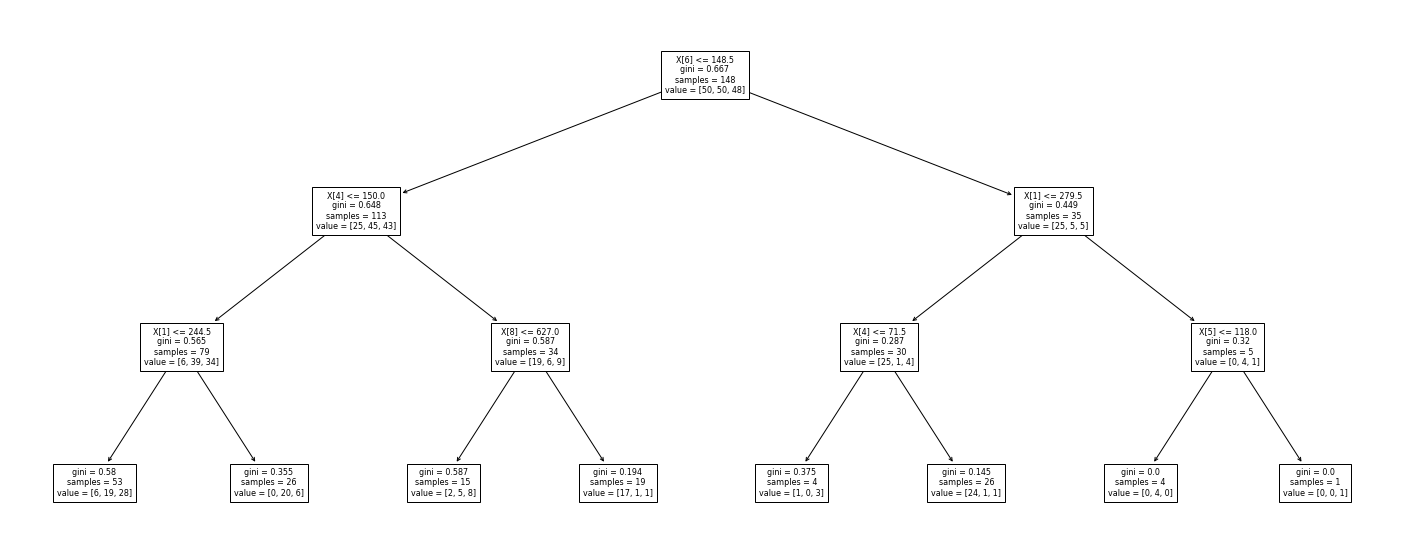

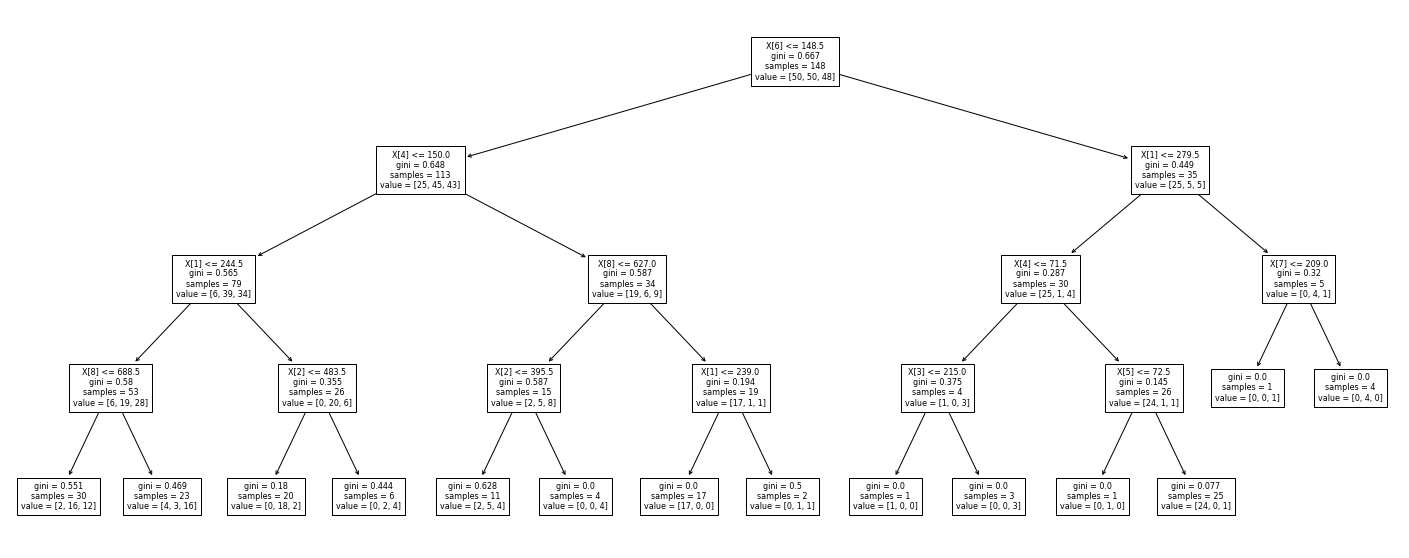

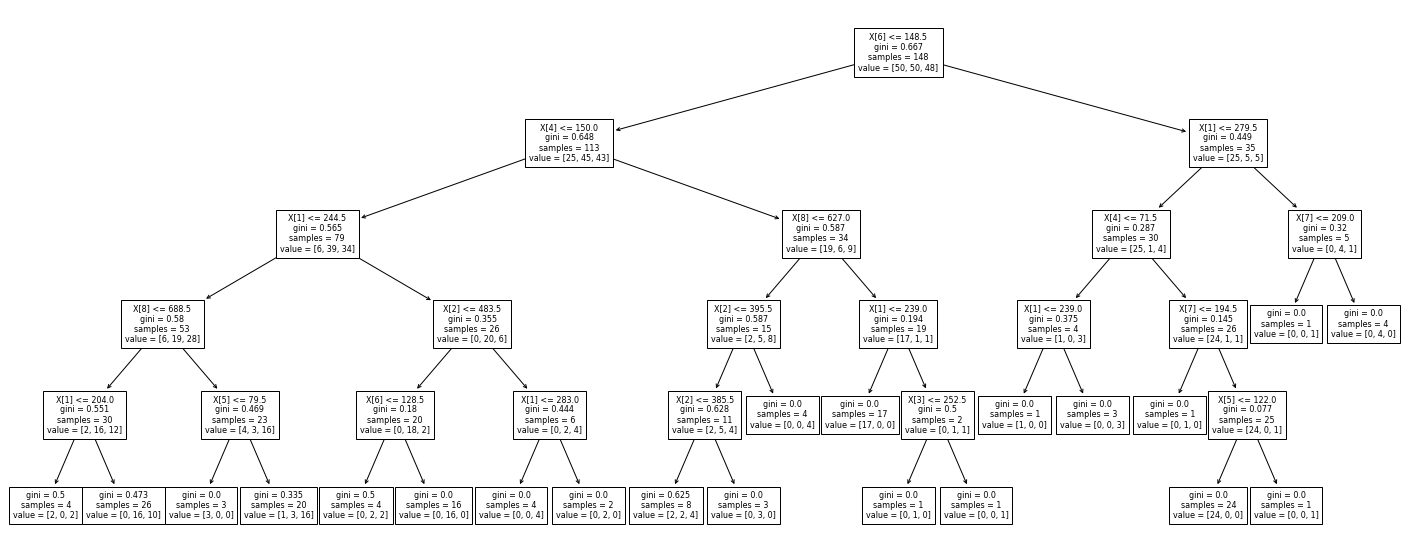

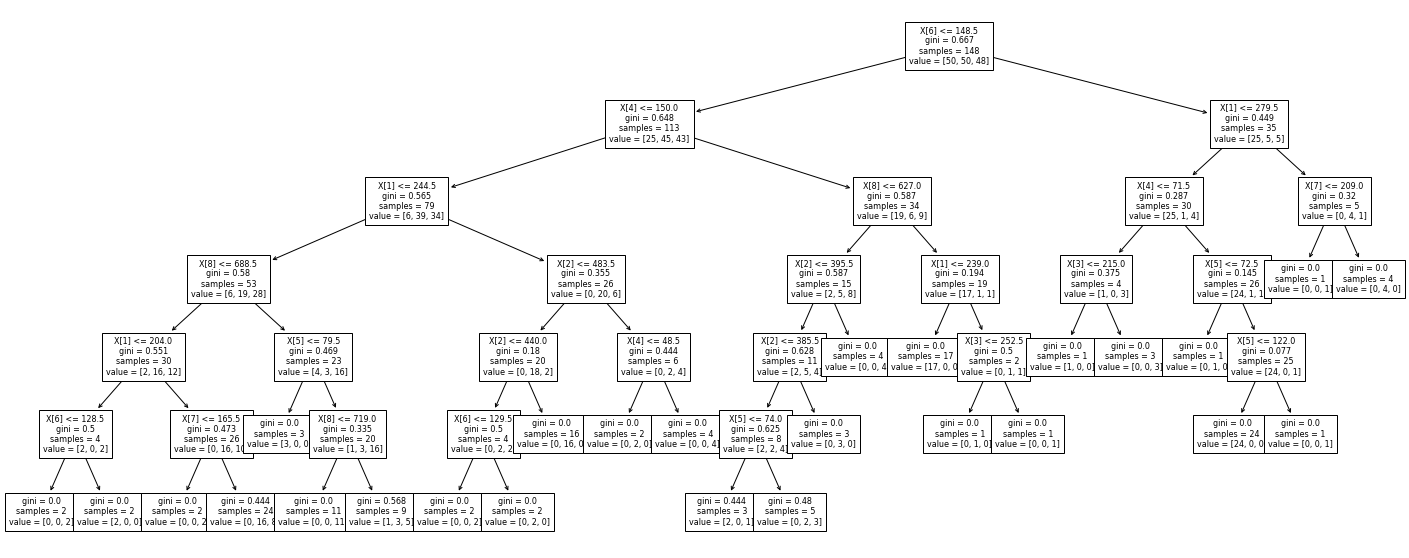

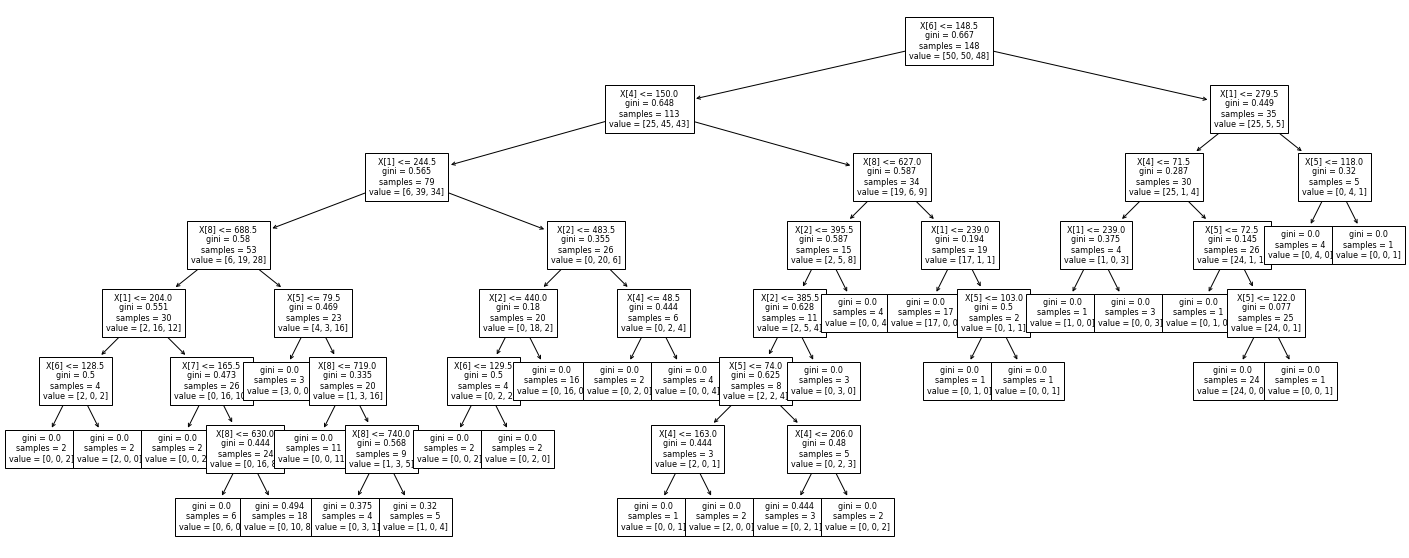

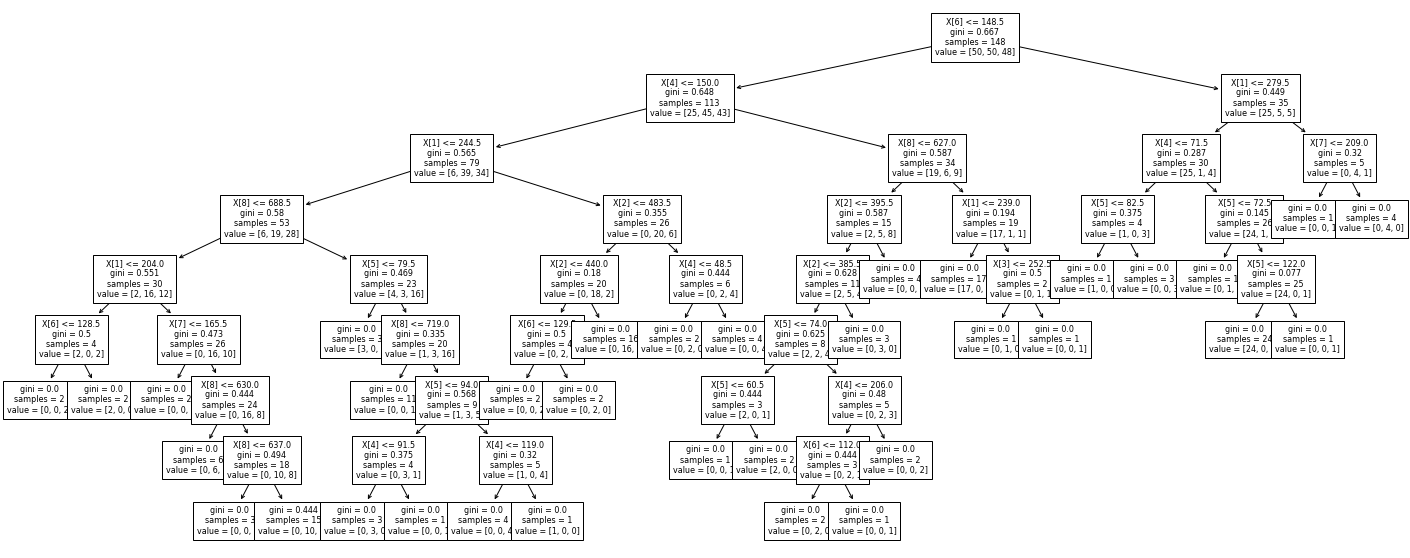

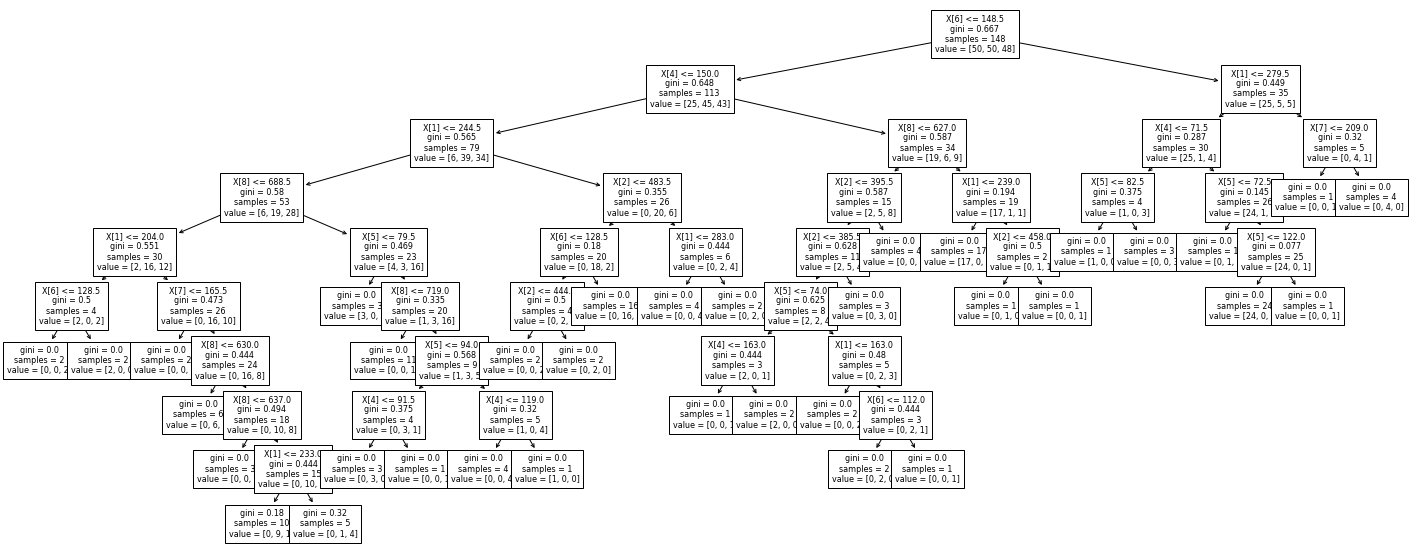

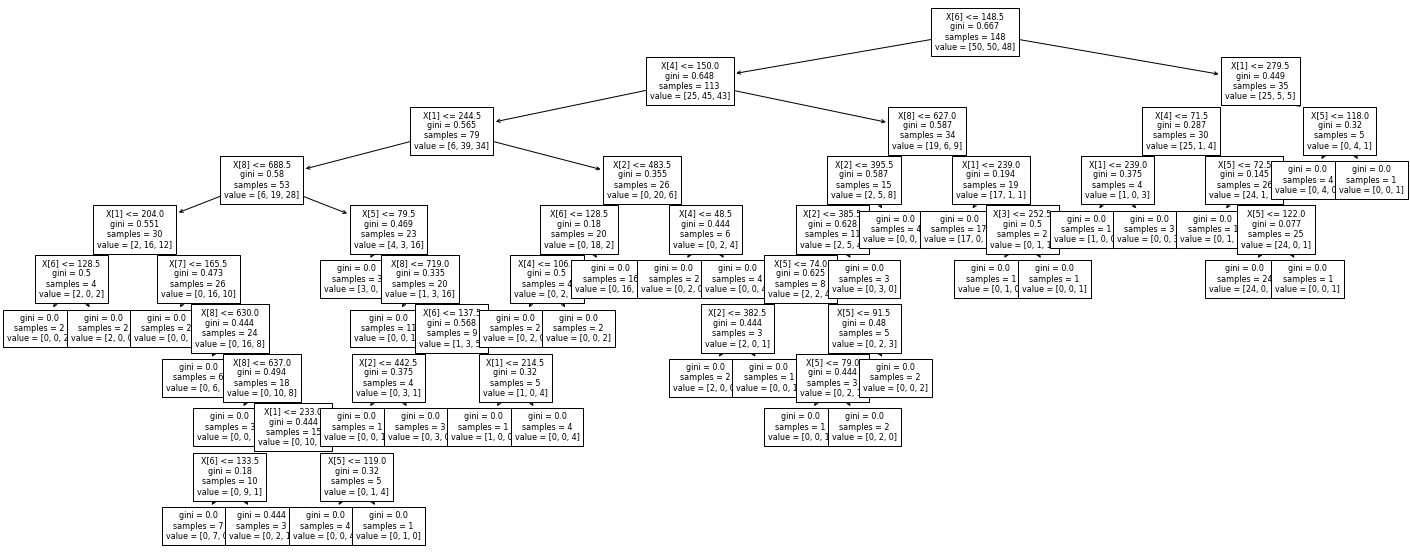

In [8]:
from sklearn import tree
for i in range (10):
    clf = tree.DecisionTreeClassifier(random_state=1, max_depth=(i+1))
    clf = clf.fit(X, Y)
    plt.figure(figsize=(25,10))
    tree.plot_tree(clf, fontsize=8)
    #plt.show()
    #plt.savefig("./Figures/graph"+str(i+1))

[Text(891.25, 498.3, 'X[6] <= 148.5\ngini = 0.667\nsamples = 148\nvalue = [50, 50, 48]'),
 Text(561.875, 407.70000000000005, 'X[4] <= 150.0\ngini = 0.648\nsamples = 113\nvalue = [25, 45, 43]'),
 Text(310.0, 317.1, 'X[1] <= 244.5\ngini = 0.565\nsamples = 79\nvalue = [6, 39, 34]'),
 Text(155.0, 226.5, 'X[8] <= 688.5\ngini = 0.58\nsamples = 53\nvalue = [6, 19, 28]'),
 Text(77.5, 135.89999999999998, 'X[1] <= 204.0\ngini = 0.551\nsamples = 30\nvalue = [2, 16, 12]'),
 Text(38.75, 45.299999999999955, 'gini = 0.5\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(116.25, 45.299999999999955, 'gini = 0.473\nsamples = 26\nvalue = [0, 16, 10]'),
 Text(232.5, 135.89999999999998, 'X[5] <= 79.5\ngini = 0.469\nsamples = 23\nvalue = [4, 3, 16]'),
 Text(193.75, 45.299999999999955, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(271.25, 45.299999999999955, 'gini = 0.335\nsamples = 20\nvalue = [1, 3, 16]'),
 Text(465.0, 226.5, 'X[2] <= 483.5\ngini = 0.355\nsamples = 26\nvalue = [0, 20, 6]'),
 Text(387.5, 135.8

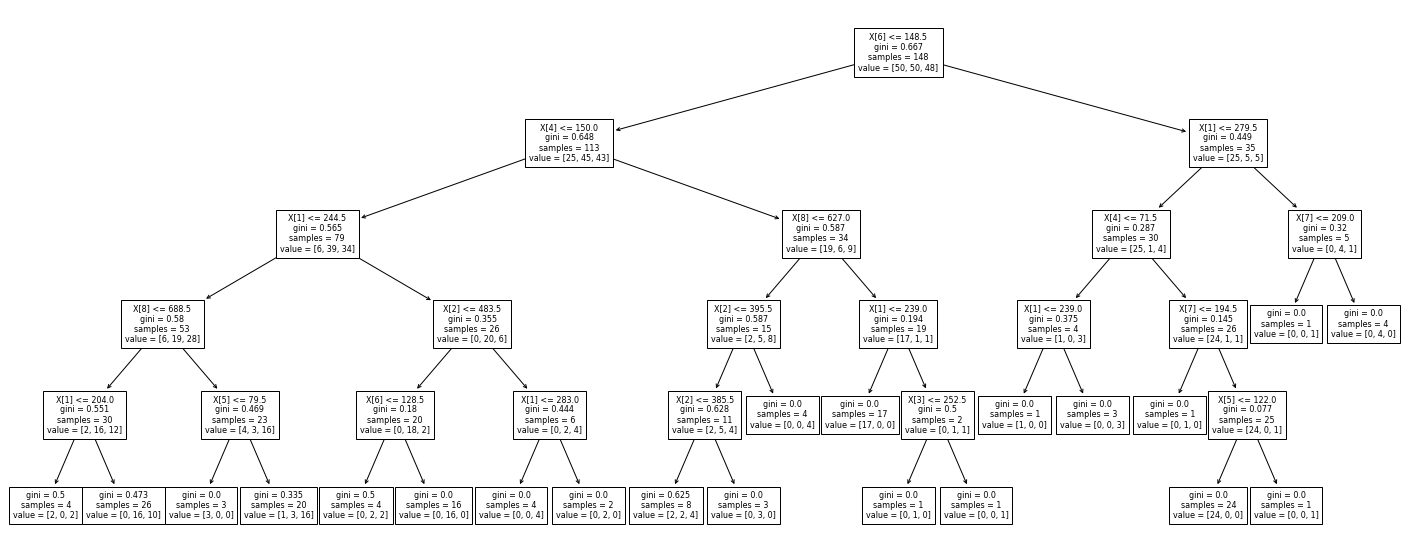

In [21]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=1, max_depth=(5)) # Best RSS's
clf = clf.fit(X, Y)
plt.figure(figsize=(25,10))
tree.plot_tree(clf, fontsize=8)

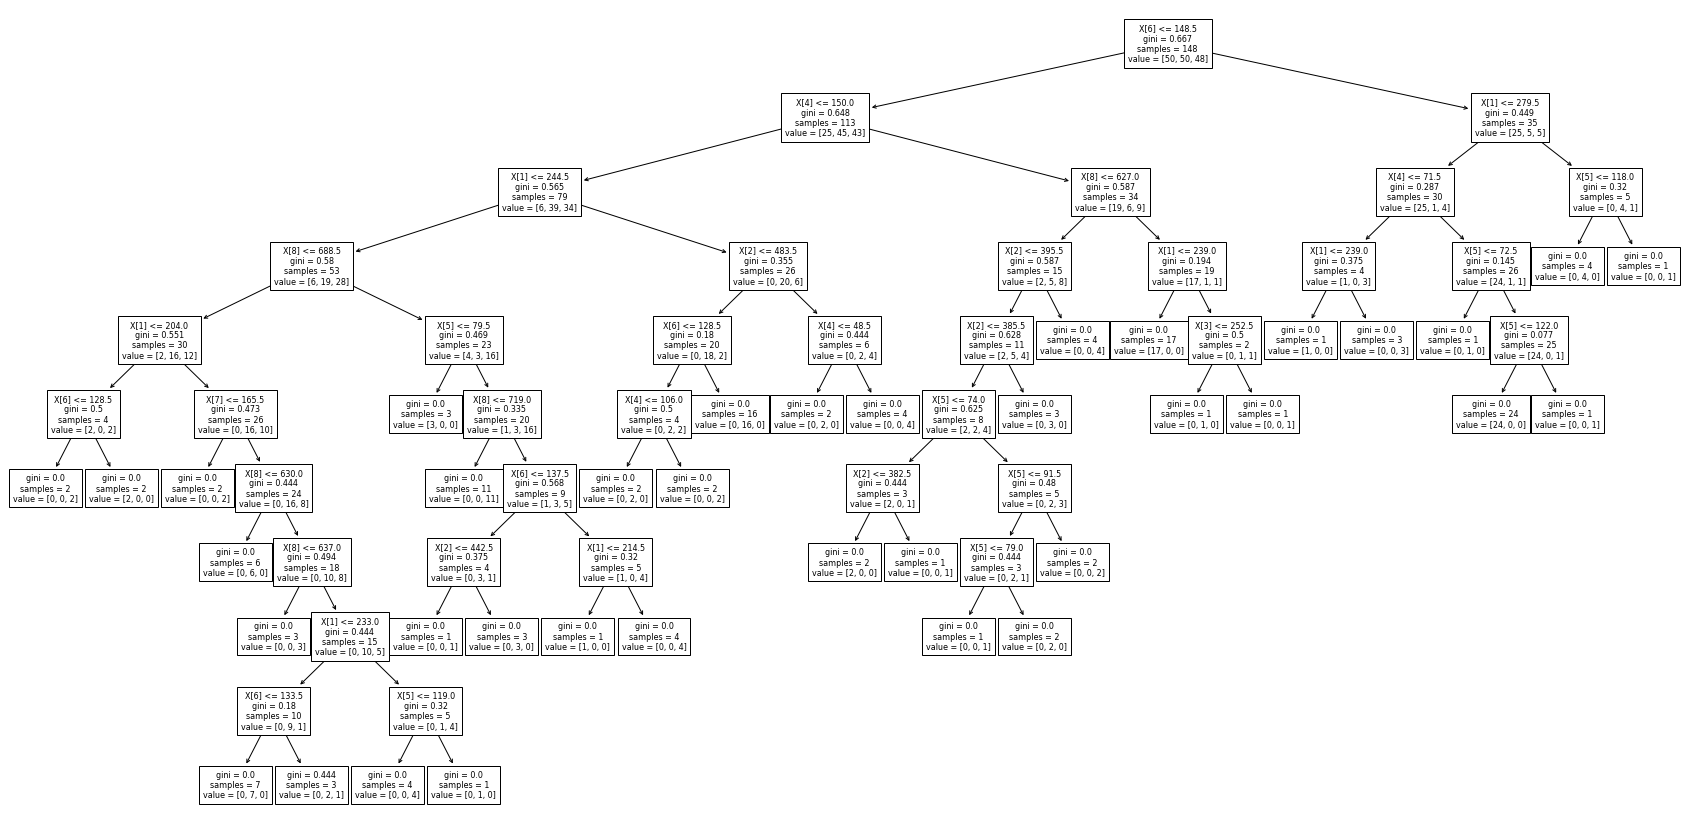

In [9]:
plt.figure(figsize=(30,15))
tree.plot_tree(clf, fontsize=8)
plt.show()

In [10]:
predictions = clf.predict(X_test)
print(predictions)

[0 2 0 1 0 1 2 1 2 1 1 2 0 2 0 2 1 2 0 1 1 0 1 0 2 1 2 0 2 1 0 1 0 1 1 0 0
 0 1 1 1 0 2 0 2]


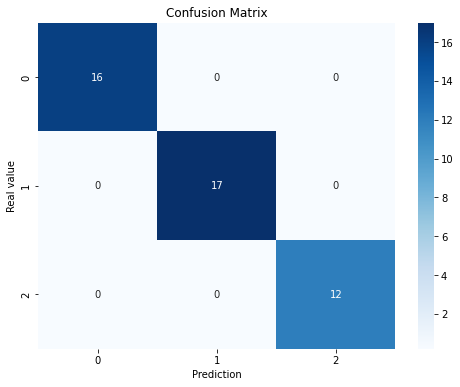

f1_score 1.0
accuracy 1.0
predictions 1.0


In [11]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
# confusion matrix
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",vmin = 0.2)
plt.title('Confusion Matrix')
plt.ylabel('Real value')
plt.xlabel('Prediction')
plt.show()
# Evaluators
print("f1_score",f1_score(Y_test, predictions, average = 'weighted'))
print("accuracy",accuracy_score(Y_test, predictions))
print("predictions",precision_score(Y_test, predictions, average = 'weighted'))

n = 1
f1_score 0.4239316239316239
accuracy 0.5111111111111111
precision 0.42158730158730157

n = 2
f1_score 0.5841269841269843
accuracy 0.6888888888888889
precision 0.5084444444444445

n = 3
f1_score 0.71884280593958
accuracy 0.7111111111111111
precision 0.7672585504164451

n = 4
f1_score 0.7670536775543195
accuracy 0.7777777777777778
precision 0.7978835978835979

n = 5
f1_score 0.8630751964085296
accuracy 0.8666666666666667
precision 0.864795321637427

n = 6
f1_score 0.9555555555555556
accuracy 0.9555555555555556
precision 0.9555555555555556

n = 7
f1_score 0.9547699214365881
accuracy 0.9555555555555556
precision 0.960233918128655

n = 8
f1_score 0.9776121463077985
accuracy 0.9777777777777777
precision 0.9790123456790124

n = 9
f1_score 1.0
accuracy 1.0
precision 1.0

n = 10
f1_score 1.0
accuracy 1.0
precision 1.0

In [12]:
n = [1,2,3,4,5,6,7,8,9,10]
f1_score = [0.4239316239316239,0.5841269841269843,0.71884280593958,0.7670536775543195,
            0.8630751964085296,0.9555555555555556,0.9547699214365881,0.9776121463077985,
            1.,1.]
accuracy = [0.5111111111111111,0.5841269841269843,0.71884280593958,0.7670536775543195,
            0.8666666666666667,0.9555555555555556,0.9555555555555556,0.9777777777777777,
            1.,1.]
precision = [0.42158730158730157,0.5084444444444445,0.7672585504164451,0.7978835978835979,
             0.864795321637427,0.9555555555555556,0.960233918128655,0.9790123456790124,
             1.,1.]

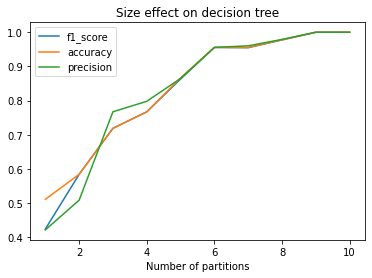

In [13]:
fig, ax = plt.subplots() 
ax.plot(n,f1_score)
ax.plot(n,accuracy)
ax.plot(n,precision)
plt.legend(["f1_score","accuracy","precision"], loc='best')
plt.title("Size effect on decision tree")
plt.xlabel('Number of partitions')
plt.show()